# Con AI Project4 节点分类

本次实验的指导中要求使用预训练方式，做这个基于Naive Bayes的实现是为了提供性能上的参考，不具备太多单独实践的意义

## 准备工作

In [ ]:
import numpy as np
import re
import random
import pandas as pd

先导入一些基本的python库

In [ ]:
from sklearn.datasets import fetch_20newsgroups # 也可以加载在本地
from sklearn.model_selection import train_test_split # 导入文本特征向量转化模块
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB # 导入朴素贝叶斯模型
from sklearn.metrics import classification_report # 模型评估模块

分别导入数据集，embedding模块，朴素贝叶斯和模型评估

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)

准备可视化工具

以下为手动实现的朴素贝叶斯方法供参考和算法原理解释，实际运用时为了方便得到评估精度和报告，依然是采取了sklearn库中的算法，所以如果单纯是想得到分类结果可以跳过以下部分

In [ ]:
news = fetch_20newsgroups(subset="all")

In [ ]:
news.target

array([10,  3, 17, ...,  3,  1,  7])

In [ ]:
train_df = pd.read_csv('train.csv', header=0)
eval_df = pd.read_csv('val.csv', header=0)

## 调用朴素贝叶斯算法

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=3)
x_train = train_df['text']
y_train = train_df['label']

x_test = eval_df['text']
y_test = eval_df['label']

In [ ]:
x_train

0        1958 films;American films;Comedy films;English...
1        American animators;Living people;Year of birth...
2        1966 births;American film actors;American tele...
3        1985 births;African American actors;American c...
4        1999 films;Canadian films;Kenyan films;English...
                               ...                        
21593           1971 films;Comedy films;Independent films;
21594    2006 films;Anime of 2006;Animated films;Robote...
21595    1996 films;Comedy films;Films directed by Rich...
21596    1943 births;Dutch Roman Catholics;Dutch cinema...
21597    1985 films;American drama films;1980s drama fi...
Name: text, Length: 21598, dtype: object

In [ ]:
#3 贝叶斯分类器对新闻进行预测
# 进行文本转化为特征
vec = CountVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)
# 初始化朴素贝叶斯模型
mnb = MultinomialNB()
# 训练集合上进行训练， 估计参数
mnb.fit(x_train, y_train)
# 对测试集合进行预测 保存预测结果
y_predict = mnb.predict(x_test)
#模型评估
print("Accuracy:", mnb.score(x_test, y_test))
print("Indicators：\n",classification_report(y_test, y_predict))

Accuracy: 0.92
Indicators：
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       715
           1       0.85      0.83      0.84       261
           2       0.63      0.31      0.41       169
           3       1.00      1.00      1.00      1255

    accuracy                           0.92      2400
   macro avg       0.83      0.77      0.79      2400
weighted avg       0.91      0.92      0.91      2400



## 朴素贝叶斯算法的交叉验证

接下来实现交叉验证，获取最优的超参数lambda（拉普拉斯平滑因子），即使这是统计机器学习算法也比较耗时，所以现在的深度学习任务中一般不做Cross Validation

In [ ]:
# 交叉验证
cross_validation_list= []
lambda_list = [0.0001,0.001,0.01,0.05,0.125,0.25,0.5,0.75,1,2] #构造超参数搜索空间
for hyper_param in lambda_list:
    temp_acc = 0
    temp_acc_list = []
    for fold in range(0,5):
        rand_state = random.randrange(0,100) #设置随机的随机状态
        # x_train, x_test, y_train, y_test = train_test_split(news.data,news.target,test_size=0.2,random_state=rand_state)
        x_train = train_df['text']
        y_train = train_df['label']
        x_test = eval_df['text']
        y_test = eval_df['label']
        vec = CountVectorizer()
        x_train = vec.fit_transform(x_train)
        x_test = vec.transform(x_test)
        # 初始化朴素贝叶斯模型
        multinomial_naive_bayes = MultinomialNB(alpha=hyper_param)
        # 训练集合上进行训练， 估计参数
        multinomial_naive_bayes.fit(x_train, y_train)
        # 对测试集合进行预测 保存预测结果
        y_predict = multinomial_naive_bayes.predict(x_test)
        fold_accuracy = multinomial_naive_bayes.score(x_test, y_test)
        print("validation accuracy:", fold_accuracy ,"fold",fold+1,"lambda=",hyper_param)
        temp_acc+=fold_accuracy
        temp_acc_list.append(fold_accuracy)
    print("lambda:",hyper_param,"accuracy:",temp_acc/5)
    cross_validation_list.append(temp_acc_list)

validation accuracy: 0.9258333333333333 fold 1 lambda= 0.0001
validation accuracy: 0.9258333333333333 fold 2 lambda= 0.0001
validation accuracy: 0.9258333333333333 fold 3 lambda= 0.0001
validation accuracy: 0.9258333333333333 fold 4 lambda= 0.0001
validation accuracy: 0.9258333333333333 fold 5 lambda= 0.0001
lambda: 0.0001 accuracy: 0.9258333333333333
validation accuracy: 0.9279166666666666 fold 1 lambda= 0.001
validation accuracy: 0.9279166666666666 fold 2 lambda= 0.001
validation accuracy: 0.9279166666666666 fold 3 lambda= 0.001
validation accuracy: 0.9279166666666666 fold 4 lambda= 0.001
validation accuracy: 0.9279166666666666 fold 5 lambda= 0.001
lambda: 0.001 accuracy: 0.9279166666666667
validation accuracy: 0.9258333333333333 fold 1 lambda= 0.01
validation accuracy: 0.9258333333333333 fold 2 lambda= 0.01
validation accuracy: 0.9258333333333333 fold 3 lambda= 0.01
validation accuracy: 0.9258333333333333 fold 4 lambda= 0.01
validation accuracy: 0.9258333333333333 fold 5 lambda= 0.0

## 交叉验证结果的可视化

In [ ]:
cv_mean=[] # 交叉验证得到的均值
for lst in cross_validation_list:
    cv_mean.append(np.mean(lst))

In [ ]:
# np.savetxt("cv_mean.csv", cv_mean, delimiter=',') # 也是方便我导入latex罢了，没有这个需求可以不做

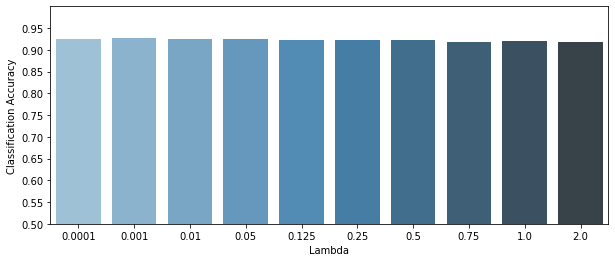

In [ ]:
df = pd.DataFrame()
df['Lambda'] = lambda_list
df['Classification Accuracy'] =  cv_mean
plt.figure(figsize=(10, 4))
plt.ylim((0.5,1))
my_y_ticks = np.arange(0.5,1,0.05)
plt.yticks(my_y_ticks)
p1=sns.barplot( data=df, x='Lambda', y='Classification Accuracy',palette="Blues_d")
plt.show()
#我觉得seaborn制图的默认效果比matplotlib好看些

In [ ]:
err_plot_data_dict = dict(zip(lambda_list,cross_validation_list)) # 制作字典，用于数据可视化

In [ ]:
k_to_accuracies=err_plot_data_dict
k_choices = lambda_list

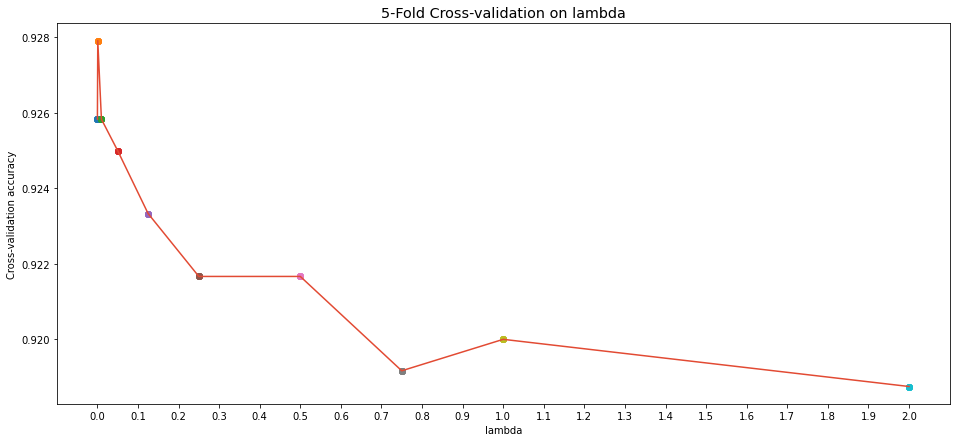

In [ ]:
plt.rcParams['figure.figsize'] = (16.0, 7.0)
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
plt.style.use('ggplot')
# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std,ecolor='royalblue')
my_x_ticks = np.arange(0,2.1,0.1)
plt.xticks(my_x_ticks)
plt.title('5-Fold Cross-validation on lambda')
plt.xlabel('lambda')
plt.ylabel('Cross-validation accuracy')
plt.show()

## 选取最优模型参数

In [ ]:
x_train = train_df['text']
y_train = train_df['label']

x_test = eval_df['text']
y_test = eval_df['label']

In [ ]:
#3 贝叶斯分类器对新闻进行预测
# 进行文本转化为特征
vec = CountVectorizer()
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)
# 初始化朴素贝叶斯模型
mnb = MultinomialNB(alpha=0.001)
# 训练集合上进行训练， 估计参数
mnb.fit(x_train, y_train)
# 对测试集合进行预测 保存预测结果
y_predict = mnb.predict(x_test)
#模型评估
print("Accuracy:", mnb.score(x_test, y_test))
print("Indicators：\n",classification_report(y_test, y_predict))

Accuracy: 0.9279166666666666
Indicators：
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       715
           1       0.83      0.87      0.85       261
           2       0.66      0.51      0.58       169
           3       1.00      1.00      1.00      1255

    accuracy                           0.93      2400
   macro avg       0.85      0.83      0.83      2400
weighted avg       0.92      0.93      0.93      2400



4分类问题准确率达到了93%，这体现出了朴素贝叶斯模型的有效性。而对Laplacian Smoothing的分析中可见平化程度越小，文本分类准确率越高（越逼近理论最优值）。
